# Zuber Ride Share Analysis in Chicago

This project explores taxi trip data in Chicago to identify key trends in ride distribution and popular drop-off locations. Using two datasets, we analyze the number of trips completed by various taxi companies in November, 2017, and determine the most frequent drop-off locations based on the average number of trips in November 2017. The analysis includes inspecting the data, ranking taxi companies, identifying the top drop-off neighborhoods, and visualizing key insights. This analysis will provide valuable insights into the distribution of taxi trips in Chicago, helping  taxi operators and urban planners make data-driven decisions to improve transportation services.

Heather Marie Culligan

Feb 2025

First, I will import helpful libraries that will assist in analysis of the data. Then, I will import the data files used for analysis. Following this I will view the data types and a brief overview of the data using info, head, and describe respectively. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

In [2]:
df1=pd.read_csv('/datasets/project_sql_result_01.csv')
df2=pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
df1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
df1.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [8]:
df2.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [9]:
df1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [10]:
df2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [11]:
df1.duplicated().sum()

0

In [12]:
df2.duplicated().sum()

0

After viewing the data, it appears all data types are correct. Let’s start to  visualize the data:

In [13]:
top10_neighborhoods=df2.nlargest(10, 'average_trips')
print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


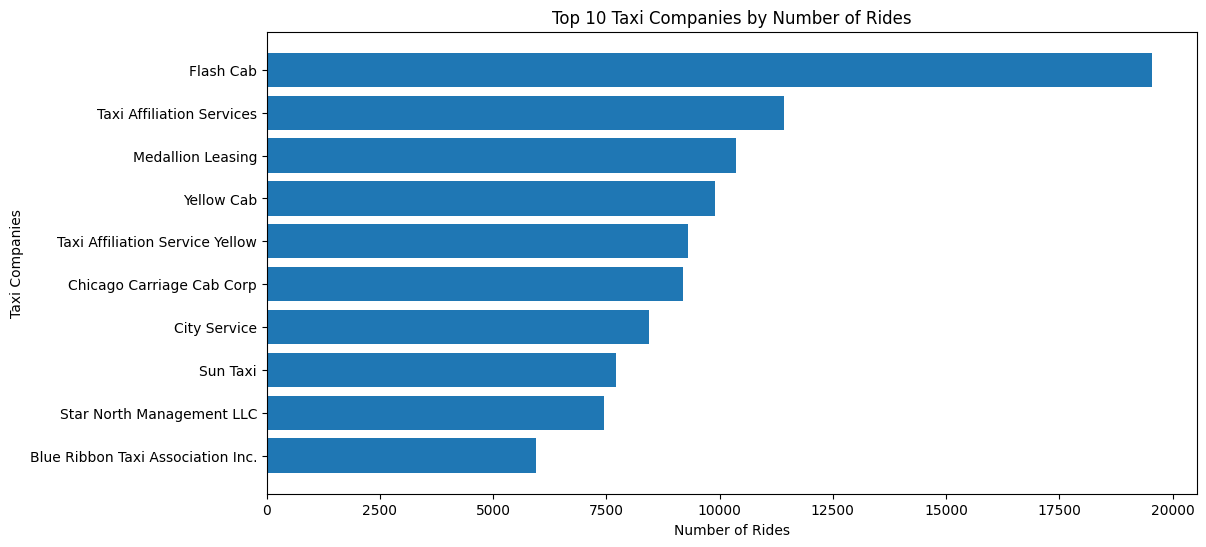

In [14]:
plt.figure(figsize=(12,6))
df1_sorted = df1.sort_values(by='trips_amount', ascending=False).head(10)
plt.barh(df1_sorted['company_name'], df1_sorted['trips_amount'])
plt.xlabel("Number of Rides")
plt.ylabel("Taxi Companies")
plt.title("Top 10 Taxi Companies by Number of Rides")
plt.gca().invert_yaxis() 
plt.show()

The analysis shows that a few major taxi companies, like Flash Cab and Taxi Affiliation Services, dominate the market, while smaller companies handle fewer trips. Most drop-offs occur in busy areas like Loop, River North, and Streeterville, with O’Hare Airport also seeing high demand. Some residential areas, like Lake View, have notable taxi use, likely due to commuting and nightlife. These findings suggest that taxis are most needed in business and travel hubs, and smaller companies may need better strategies to compete.

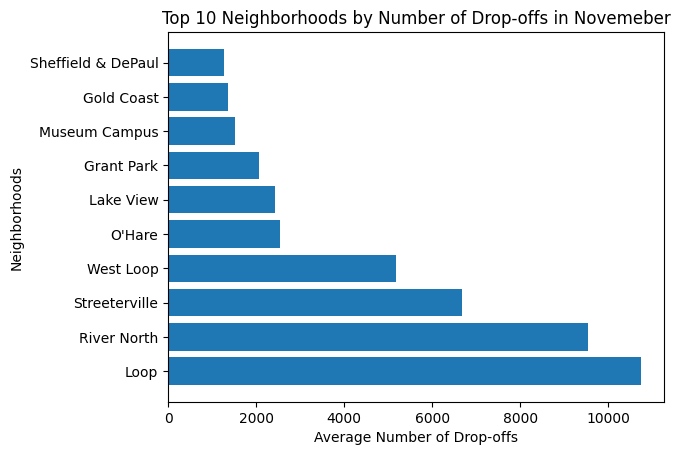

<Figure size 1200x600 with 0 Axes>

In [15]:
plt.barh(top10_neighborhoods['dropoff_location_name'], top10_neighborhoods['average_trips'])
plt.xlabel("Average Number of Drop-offs")
plt.ylabel("Neighborhoods")
plt.title("Top 10 Neighborhoods by Number of Drop-offs in Novemeber")
plt.figure(figsize=(12,6))
plt.show()

The analysis shows that taxi drop-offs are highest in Loop, River North, and Streeterville, likely due to offices, hotels, and nightlife attractions. O’Hare International Airport also sees heavy taxi traffic, reflecting the demand for airport transfers. Some residential areas like Lake View have notable taxi use, possibly due to commuters and nightlife. Overall, taxis are most used in busy commercial and travel hubs, with lower demand in outer neighborhoods.

Testing a hypothesis:

In [16]:
df3=pd.read_csv('/datasets/project_sql_result_07.csv')

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
df3.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [29]:
df3.duplicated().sum()

197

We see there may be duplicates but due to rounding of the original data we cannot be sure if they are true duplicates. We will leave them in as to not distort the data. 

In [19]:
df3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [20]:
print(df3['weather_conditions'].unique())

['Good' 'Bad']


In [21]:
df3['start_ts']= pd.to_datetime(df3['start_ts'])
df3['day_of_week']= df3['start_ts'].dt.day_name()
saturday_rides= df3[df3['day_of_week'] == 'Saturday']

In [22]:
print(saturday_rides)

                start_ts weather_conditions  duration_seconds day_of_week
0    2017-11-25 16:00:00               Good            2410.0    Saturday
1    2017-11-25 14:00:00               Good            1920.0    Saturday
2    2017-11-25 12:00:00               Good            1543.0    Saturday
3    2017-11-04 10:00:00               Good            2512.0    Saturday
4    2017-11-11 07:00:00               Good            1440.0    Saturday
...                  ...                ...               ...         ...
1063 2017-11-25 11:00:00               Good               0.0    Saturday
1064 2017-11-11 10:00:00               Good            1318.0    Saturday
1065 2017-11-11 13:00:00               Good            2100.0    Saturday
1066 2017-11-11 08:00:00               Good            1380.0    Saturday
1067 2017-11-04 16:00:00                Bad            2834.0    Saturday

[1068 rows x 4 columns]


In [23]:
bad_weather_saturday_rides= saturday_rides[saturday_rides['weather_conditions'] == 'Bad']
bad_weather_saturday_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
 3   day_of_week         180 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.0+ KB


In [24]:
good_weather_saturday_rides= saturday_rides[saturday_rides['weather_conditions'] == 'Good']
good_weather_saturday_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    float64       
 3   day_of_week         888 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.7+ KB


In [25]:
good_weather_saturday_rides = good_weather_saturday_rides.dropna(subset=['duration_seconds'])
bad_weather_saturday_rides = bad_weather_saturday_rides.dropna(subset=['duration_seconds'])

In [26]:
good_weather_saturday_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    float64       
 3   day_of_week         888 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.7+ KB


In [27]:
bad_weather_saturday_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
 3   day_of_week         180 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.0+ KB


Null hypothesis(H0): The average ride duration from the Loop to O'Hare does not change on rainy Saturdays compared to other Saturdays.
Alternate hypothesis(H1): The average ride duration changes on rainy Saturdays.

Significance level: set to 0.05 to minimize chances of false positives.

In [28]:
alpha = 0.05
t_stat, p_value = ttest_ind(
    good_weather_saturday_rides['duration_seconds'],
    bad_weather_saturday_rides['duration_seconds'],
    equal_var=True 
)
t_stat, p_value, f"Since the p-value ({p_value:.2e}) is {'less' if p_value < alpha else 'greater'} than the significance level ({alpha}), we {'reject' if p_value < alpha else 'fail to reject'} the null hypothesis."

(-6.946177714041499,
 6.517970327099473e-12,
 'Since the p-value (6.52e-12) is less than the significance level (0.05), we reject the null hypothesis.')

Since the p-value is much smaller than 0.05, we reject the null hypothesis, meaning that ride durations on bad weather Saturdays are significantly different from those on good weather Saturdays.




This project analyzed taxi ride data from Chicago, focusing on ride distribution, top drop-off locations, and the impact of weather conditions on travel time. The findings revealed that a few major taxi companies dominate the market, with most drop-offs occurring in busy commercial and travel hubs like Loop, River North, and O’Hare Airport.

A key hypothesis test examined whether ride durations from the Loop to O’Hare change on bad weather Saturdays. Using an independent t-test, we found a statistically significant difference in ride durations, leading us to reject the null hypothesis. This suggests that bad weather conditions affect travel times, likely due to factors such as traffic congestion, slower driving speeds, and reduced visibility.

These insights can help taxi operators optimize fleet distribution, urban planners improve transportation infrastructure, and commuters better anticipate travel delays under different weather conditions.